In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r'C:\Users\hp\OneDrive\DATASCIENCE\DATAFILES\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Steps in outlier analysis

- step1: Find Q1,Q2,Q3
    - np.percentile(column data,q)
- step2: calculate the IQR
    - IQR=Q3-Q1
- step3: calculate lower boundary and upper boundary
    - lb: Q1-1.5IQR
    - ub: Q3+1.5IQR
- step4: Find the outliers df
    - c1: column data < lb
    - c2: column data > ub
    - c: apply the main condition
    - main data[c]

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q1

34015.479999999996

In [5]:
Q3=np.percentile(visa_df['prevailing_wage'],75)
Q3

107735.51250000001

In [6]:
IQR=Q3-Q1
IQR

73720.03250000002

In [7]:
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
lb,ub

(-76564.56875000002, 218315.56125000003)

In [8]:
c1=visa_df['prevailing_wage']< lb
c2=visa_df['prevailing_wage']> ub
c=c1|c2
c
outliers_df=visa_df[c]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [9]:
c1=visa_df['prevailing_wage']> lb
c2=visa_df['prevailing_wage']< ub
nonoutliers_df=visa_df[c1&c2]
nonoutliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Compare original data with non outlier data

**will plot histogram and boxplot**

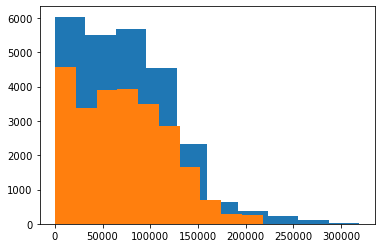

In [10]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(nonoutliers_df['prevailing_wage'])
plt.show()

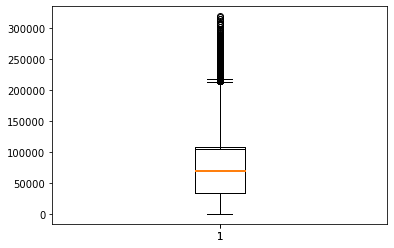

In [11]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(nonoutliers_df['prevailing_wage'])
plt.show()

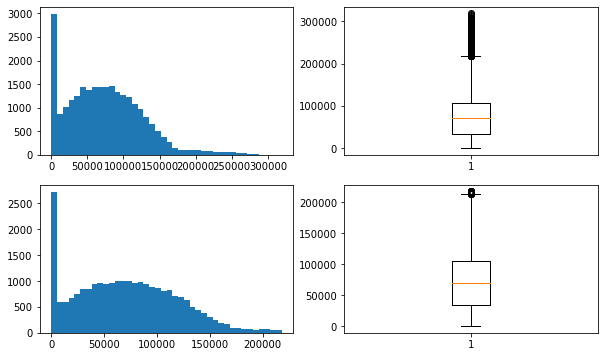

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(nonoutliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(nonoutliers_df['prevailing_wage'])
plt.show()

# How deal will the outlier

**Drop the outliers**
- we can drop the outliers if outliers percentage < 2%
- But this is not recommended, we lost other columns data also 

**impute with median values**
- as we know that median doesnot affect by outliers 
- so it is good practice we can impute outliers with median value

**cap with Q3 or Q1 value**
- if outliers are present less than lower bound then fill with Q1
- if outliers are more than upper bound then fill with Q3

In [13]:
# Task 3
#read the each ovservation from prevailing wage
#if that observation <lb or >ub : fill the median value
#else:keep as it is


#take empty list=[]
#median=visa_df['pwage'].median()
#for i in visa_df['pwage']:
#   if i <lb or >ub:
#     emptylist.append(median)
#   else:
#      emptylist.append(i)

#25480

In [15]:
median_value=[]
unchanged_value=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        median_value.append(median)
    else:
        median_value.append(i)
len(median_value )
median_value

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [17]:
median_value=[]
unchanged_value=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        median_value.append(median)
    else:
        median_value.append(i)
visa_df['prevailing_wage_new']=median_value

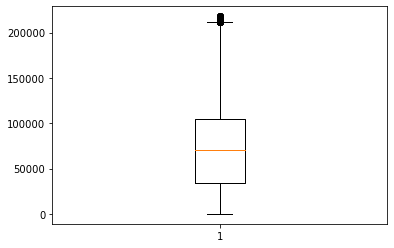

In [18]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

**np.where**

In [19]:
path=r'C:\Users\hp\OneDrive\DATASCIENCE\DATAFILES\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- above replace one we use a traditional approach
- for loop, list,if-else
- the same we can get by using no.where method

In [21]:
dict1={'Name':['A','B','C','D'], 'Num':[1,2,3,4]}
df=pd.DataFrame(dict1)

In [ ]:
#i want to replace 100 num which has > 2
#

np.where(con,True,False)

-will take three arguement
- condition
  - con=d['Num']>2
- True value
  - t=100
- False value
  - f=d['Num']

In [25]:
l=np.where(df['Num']>2,100,df['Num'])
df['Num']=l
df

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [ ]:
median_value=[]
unchanged_value=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        median_value.append(median)
    else:
        median_value.append(i)

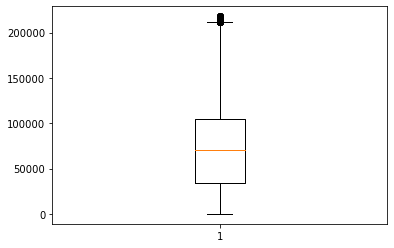

In [33]:
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
median=visa_df['prevailing_wage'].median()
con=c1|c2

l=np.where(con,median,visa_df['prevailing_wage'])
visa_df['prevailing_wage']=l

plt.boxplot(visa_df['prevailing_wage'])
plt.show()